# K-Nearest Neighbors

k- Nearest Neighbor is a classification algorithm,that works based on distance betweens the datapoints. When the class label of a new instance/ data point have to be predicted, its distance from all other data points are calculated, and the class label for 'k' nearest neighbours are considered for majority polling. Which ever class gets majority, it will be assigned as the label for the new instance.

In [2]:
#importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Importing the bank dataset

bank_data = pd.read_csv(r'E:\31-08-2024\Desktop\Projects\Machine Learning\K_NN\k Nearest Neighbours\bank\bank_dataset.csv')

In [6]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
x = bank_data.loc[0,["age","duration"]]
y = bank_data.loc[1,["age","duration"]]

z = np.linalg.norm(x-y)
print(z)

112.0044641967453


#Normalizing the data

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_to_scale = ["age","duration"]
scaled_values = scaler.fit_transform(bank_data[features_to_scale])
bank_data["norm_age"] = scaled_values[:,0]
bank_data["norm_duration"] = scaled_values[:,1]


In [11]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,norm_age,norm_duration
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.481481,0.053070
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.493827,0.030297
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.246914,0.045954
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.283951,0.030704
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.481481,0.062424


# Splitting the data into train and test data

In [13]:
from sklearn.model_selection import train_test_split

X = bank_data[["norm_age","norm_duration"]]
Y = bank_data["y"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 50)

print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(41188, 2) (24712, 2) (16476, 2)
(41188,) (24712,) (16476,)


# Building the K-NN model

In [29]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 20,metric = 'euclidean')
model.fit(X_train,Y_train)
                             

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

# Measuring the accuracy

In [30]:
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)

print("train_accuracy :",train_accuracy)
print("test_accuracy :",test_accuracy)

train_accuracy : 0.8999676270637746
test_accuracy : 0.892571012381646


In [31]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.892571012381646

Performance measuring on different values of K

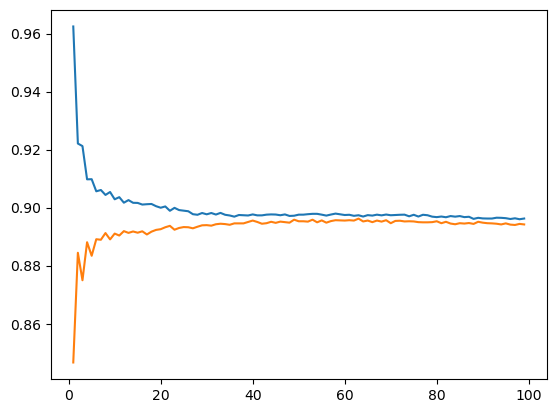

In [18]:
train_accuracies = []
test_accuracies = []

k_vals = [i for i in range(1,100)]

for k in k_vals:
    model = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    model.fit(X_train,Y_train)
    train_accuracy_k = model.score(X_train,Y_train)
    test_accuracy_k = model.score(X_test,Y_test)
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)

plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)

# How to select K value?

In [19]:
# Solution 1 : Sqrt of n (n is number of occurences) 
# Solution 2 : Experimentation using cross_validation

In [21]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8942097596504006

In [22]:
scores = []

for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(Y_test,y_pred)
    scores.append(score)
    
    

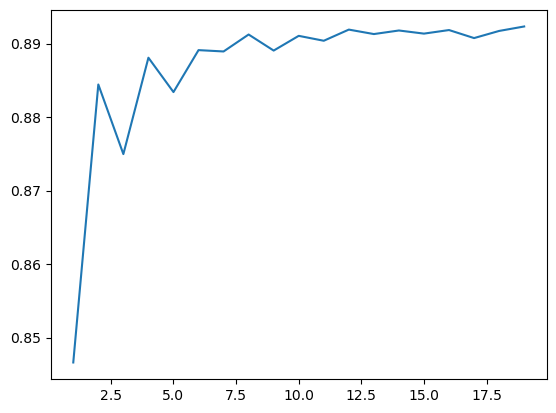

In [24]:
plt.plot(range(1,20),scores)
plt.show()

In [34]:
# So, Before the accuracy_score is 87 because we took K value as "3". Now retrain the data and take K value as 20, Now accuracy_score has increased to 89
# It basically depends on the dataset. It is one of the method (cross_validation) to choose k value.